In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [3]:
ruta = '/content/drive/MyDrive/datasets/housing.csv'
datos = pd.read_csv(ruta)
datos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


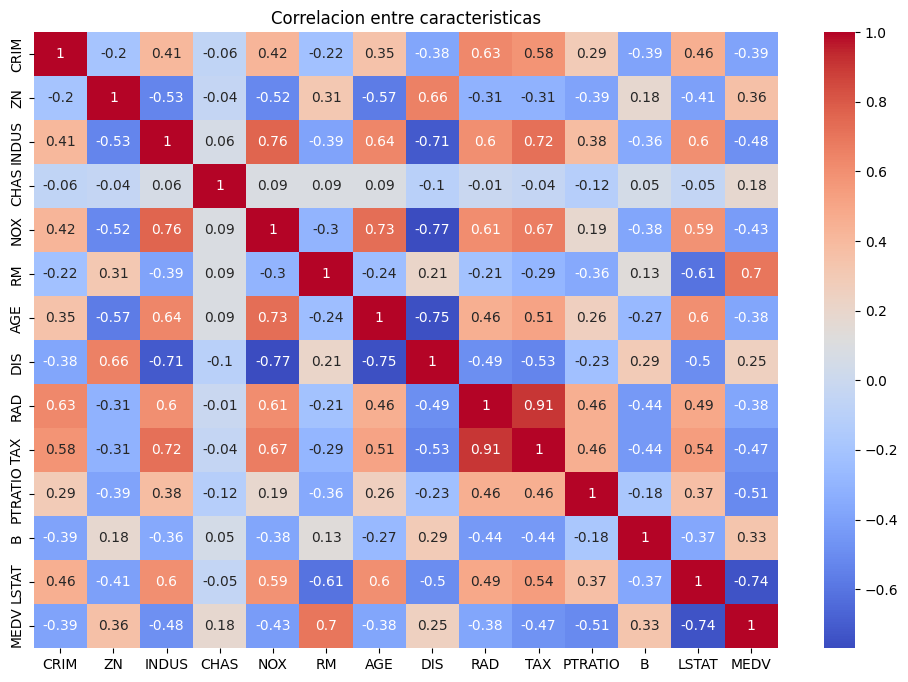

In [6]:
matriz_correlacion = datos.corr().round(2)
plt.figure(figsize=(12,8))
sns.heatmap(data = matriz_correlacion, annot=True, cmap='coolwarm')
plt.title("Correlacion entre caracteristicas")
plt.show()

In [7]:
X = datos.drop('MEDV',axis=1)
y = datos['MEDV']

In [8]:
escala = StandardScaler()
X_escaladas = escala.fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_escaladas, y, test_size=0.2, random_state=42)

In [12]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = modelo.predict(X_test)

In [18]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Error cuadratico medio: ", round(mse,2))
print("R2 : ",round(r2,2))

Error cuadratico medio:  24.29
R2 :  0.67


In [19]:
joblib.dump(modelo, "regresion_lineal.pkl")

['regresion_lineal.pkl']

In [21]:
modelo_cargado = joblib.load('regresion_lineal.pkl')

In [22]:
nuevos_datos = np.array([[0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296.0,15.3,396.90,4.98]])
nuevos_datos_escalados = escala.transform(nuevos_datos)
prediccion = modelo_cargado.predict(nuevos_datos_escalados)
print("Precio prediccion: ",prediccion)

Precio prediccion:  [29.95339638]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
